
   # <b><center><font size="15"><span style='font-family:"Times New Roman"'>TELECOM CHURN CASE STUDY </span></font></center></b>

***
 

<u><font size="6"><span style='font-family:"Times New Roman"'>Problem Statement</span></font></u>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.Churn prediction is usually more critical for prepaid customers.We need to use the usage-based definition to define churn.

<u><font size="6"><span style='font-family:"Times New Roman"'>High Value Churn</span></font></u>

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define high-value customers based on a certain metric  and predict churn only on high-value customers.

<u><font size="6"><span style='font-family:"Times New Roman"'>Model Approach</span></font></u>

Build models to predict churn. The predictive model that we are going to build will serve two purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

<u><font size="6"><span style='font-family:"Times New Roman"'>Business Objective</span></font></u>

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months


<u><font size="6"><span style='font-family:"Times New Roman"'>Detailed Steps Followed while building the model</span></font></u>

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

8. Finally, recommend strategies to manage customer churn based on our observations

The first model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

Therefore,we need to build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

## Import all the necessary libraries

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Ignore warnings 
import warnings
warnings.filterwarnings('ignore')
# setting restriction on the number of rows and coulmns displayed in output
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Importing Churn dataset

In [2]:
# Importing all datasets
churn = pd.read_csv("C:/Users/patelvar/Downloads/telecom_churn_data.csv")
# look at initial rows of the data
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

Understanding the structure of Churn dataset

In [3]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:

churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
#Understanding the structure of Churn dataset
churn.shape

(99999, 226)

## Handling Missing values

In [7]:
#Checking the number of missing values and its percentage
Total_missing = churn.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*churn.isnull().sum()/churn.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(30)

,Total_missing_values,Percent_missing_values
count_rech_2g_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
arpu_3g_6,74846,74.846748
arpu_2g_6,74846,74.846748
night_pck_user_6,74846,74.846748
fb_user_6,74846,74.846748


In [8]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


In [9]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [10]:
#So we can impute missing values with zeroes since it means customer didn't recharge their number that month.
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [11]:
# impute missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [12]:
#Making sure values are imputed correctly
print("Missing value ratio:\n")
print(churn[zero_impute].isnull().sum()*100/churn.shape[1])

# summary
print("\n\nSummary statistics\n")
print(churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [13]:
# drop id and date columns as it doesnt give much of inference
print("Shape before dropping: ", churn.shape)
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


### Handling categorical missing data

In [14]:

#ii) Replace NaN values in categorical variables
#We will replace missing values in the categorical values with '-1' where '-1' will be our new category.
# replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1)) 

In [15]:
#Dummify categorical variables
def doDummies(churn,cat_cols):
    print("Col being dummified: " , cat_cols)
    dff = pd.get_dummies(churn[cat_cols],prefix=cat_cols.split("_")[0]+"_"+cat_cols.split("_")[-1],drop_first=True)
    dx = pd.concat([churn,dff], axis=1)
    return dx

In [16]:
print("Before dummy cols: ",churn.shape)
for col in cat_cols:
    churn = doDummies(churn,col)
    
churn.drop(cat_cols, axis=1, inplace=True)
churn.head()

Before dummy cols:  (99999, 212)
Col being dummified:  night_pck_user_6
Col being dummified:  night_pck_user_7
Col being dummified:  night_pck_user_8
Col being dummified:  night_pck_user_9
Col being dummified:  fb_user_6
Col being dummified:  fb_user_7
Col being dummified:  fb_user_8
Col being dummified:  fb_user_9


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_6_0.0,night_6_1.0,night_7_0.0,night_7_1.0,night_8_0.0,night_8_1.0,night_9_0.0,night_9_1.0,fb_6_0.0,fb_6_1.0,fb_7_0.0,fb_7_1.0,fb_8_0.0,fb_8_1.0,fb_9_0.0,fb_9_1.0
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.2

In [17]:
#Checking the number of missing values and its percentage
Total_missing = churn.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*churn.isnull().sum()/churn.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(30)

,Total_missing_values,Percent_missing_values
count_rech_2g_6,74846,74.846748
arpu_2g_6,74846,74.846748
arpu_3g_6,74846,74.846748
count_rech_3g_6,74846,74.846748
arpu_2g_7,74428,74.428744
arpu_3g_7,74428,74.428744
count_rech_3g_7,74428,74.428744
count_rech_2g_7,74428,74.428744
arpu_2g_9,74077,74.077741
arpu_3g_9,74077,74.077741


In [18]:
# Drop variables with more than a given threshold of missing values

# Checking how many columns have more than 70% of missing data

print('Total no of columns with missing values more than 70% : {}'.format(df_missing_values[df_missing_values['Percent_missing_values'] >= 70].shape[0]))

Total no of columns with missing values more than 70% : 16


In [19]:
#Create a new dataframe named df_cleaned with all columns with data misisng < 70% for our  further analysis

churn = churn.loc[:,(100*churn.isnull().sum()/churn.shape[0]).sort_values(ascending = False) < 70]
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_6_0.0,night_6_1.0,night_7_0.0,night_7_1.0,night_8_0.0,night_8_1.0,night_9_0.0,night_9_1.0,fb_6_0.0,fb_6_1.0,fb_7_0.0,fb_7_1.0,fb_8_0.0,fb_8_1.0,fb_9_0.0,fb_9_1.0
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.1

## Filtering HVC :
The customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)- June and July.

Step 1 :Calculate total data recharge amount


In [20]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

Step 2: Add total data recharge and total recharge to get total combined recharge amount for a month

In [21]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

Step 3: Calculate average recharge done by customer in June and July

In [22]:
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

Step 4: Calculate the 70th percentile recharge amount

In [23]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


Final step : retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount


In [24]:
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 209)

In [25]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape

(30001, 204)

## Using Advanced imputation techinques to impute the remaining missing values.

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [27]:
imp = IterativeImputer(max_iter=10, verbose=2)
imp.fit(churn_filtered)
imputed_df = imp.transform(churn_filtered)


[IterativeImputer] Completing matrix with shape (30001, 204)
[IterativeImputer] Ending imputation round 1/10, elapsed time 256.82
[IterativeImputer] Change: 5516.0715236926535, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 2/10, elapsed time 500.17
[IterativeImputer] Change: 3135.4062589713703, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 3/10, elapsed time 782.06
[IterativeImputer] Change: 682.6025816745175, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 4/10, elapsed time 1067.90
[IterativeImputer] Change: 276.83945506711217, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 5/10, elapsed time 1380.01
[IterativeImputer] Change: 121.61823706353123, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 6/10, elapsed time 1880.71
[IterativeImputer] Change: 130.31871880225555, scaled tolerance: 45.735400000000006 
[IterativeImp

In [28]:
imputed_df = pd.DataFrame(imputed_df, columns=churn_filtered.columns)

In [29]:
#Checking the number of missing values and its percentage
Total_missing = imputed_df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*imputed_df.isnull().sum()/imputed_df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(30)

,Total_missing_values,Percent_missing_values
fb_9_1.0,0,0.0
isd_og_mou_6,0,0.0
og_others_8,0,0.0
og_others_7,0,0.0
og_others_6,0,0.0
spl_og_mou_9,0,0.0
spl_og_mou_8,0,0.0
spl_og_mou_7,0,0.0
spl_og_mou_6,0,0.0
isd_og_mou_9,0,0.0


### No missing values !!!

## Derive churn variable

Now tagging the churned customers (churn=1, else 0) based on the fourth month as follows:
- Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
- The attributes you need to use to tag churners are: total_ic_mou_9 total_og_mou_9 vol_2g_mb_9 vol_3g_mb_9 
- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


In [30]:
# calculate total incoming and outgoing minutes of usage
imputed_df['total_calls_mou_9'] = imputed_df.total_ic_mou_9 + imputed_df.total_og_mou_9

In [31]:
# calculate 2g and 3g data consumption
imputed_df['total_internet_mb_9'] =  imputed_df.vol_2g_mb_9 + imputed_df.vol_3g_mb_9

In [32]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
imputed_df['churn'] = imputed_df.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [33]:
# delete derived variables
imputed_df = imputed_df.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [34]:
# change data type to category
imputed_df.churn = imputed_df.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(imputed_df.churn.value_counts()*100/imputed_df.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [35]:
#Checking the number of missing values and its percentage
Total_missing = imputed_df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*imputed_df.isnull().sum()/imputed_df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(30)

,Total_missing_values,Percent_missing_values
churn,0,0.0
isd_og_mou_6,0,0.0
og_others_8,0,0.0
og_others_7,0,0.0
og_others_6,0,0.0
spl_og_mou_9,0,0.0
spl_og_mou_8,0,0.0
spl_og_mou_7,0,0.0
spl_og_mou_6,0,0.0
isd_og_mou_9,0,0.0


Calculating difference between 8th and previous months

Let's derive some variables. 
- The most important feature, in this situation, can be the difference between the 8th month and the previous months. 
- The difference can be in patterns such as usage difference or recharge value difference.
- Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [36]:
imputed_df['arpu_diff'] = imputed_df.arpu_8 - ((imputed_df.arpu_6 + imputed_df.arpu_7)/2)

imputed_df['onnet_mou_diff'] = imputed_df.onnet_mou_8 - ((imputed_df.onnet_mou_6 + imputed_df.onnet_mou_7)/2)

imputed_df['offnet_mou_diff'] = imputed_df.offnet_mou_8 - ((imputed_df.offnet_mou_6 + imputed_df.offnet_mou_7)/2)

imputed_df['roam_ic_mou_diff'] = imputed_df.roam_ic_mou_8 - ((imputed_df.roam_ic_mou_6 + imputed_df.roam_ic_mou_7)/2)

imputed_df['roam_og_mou_diff'] = imputed_df.roam_og_mou_8 - ((imputed_df.roam_og_mou_6 + imputed_df.roam_og_mou_7)/2)

imputed_df['loc_og_mou_diff'] = imputed_df.loc_og_mou_8 - ((imputed_df.loc_og_mou_6 + imputed_df.loc_og_mou_7)/2)

imputed_df['std_og_mou_diff'] = imputed_df.std_og_mou_8 - ((imputed_df.std_og_mou_6 + imputed_df.std_og_mou_7)/2)

imputed_df['isd_og_mou_diff'] = imputed_df.isd_og_mou_8 - ((imputed_df.isd_og_mou_6 + imputed_df.isd_og_mou_7)/2)

imputed_df['spl_og_mou_diff'] = imputed_df.spl_og_mou_8 - ((imputed_df.spl_og_mou_6 + imputed_df.spl_og_mou_7)/2)

imputed_df['total_og_mou_diff'] = imputed_df.total_og_mou_8 - ((imputed_df.total_og_mou_6 + imputed_df.total_og_mou_7)/2)

imputed_df['loc_ic_mou_diff'] = imputed_df.loc_ic_mou_8 - ((imputed_df.loc_ic_mou_6 + imputed_df.loc_ic_mou_7)/2)

imputed_df['std_ic_mou_diff'] = imputed_df.std_ic_mou_8 - ((imputed_df.std_ic_mou_6 + imputed_df.std_ic_mou_7)/2)

imputed_df['isd_ic_mou_diff'] = imputed_df.isd_ic_mou_8 - ((imputed_df.isd_ic_mou_6 + imputed_df.isd_ic_mou_7)/2)

imputed_df['spl_ic_mou_diff'] = imputed_df.spl_ic_mou_8 - ((imputed_df.spl_ic_mou_6 + imputed_df.spl_ic_mou_7)/2)

imputed_df['total_ic_mou_diff'] = imputed_df.total_ic_mou_8 - ((imputed_df.total_ic_mou_6 + imputed_df.total_ic_mou_7)/2)

imputed_df['total_rech_num_diff'] = imputed_df.total_rech_num_8 - ((imputed_df.total_rech_num_6 + imputed_df.total_rech_num_7)/2)

imputed_df['total_rech_amt_diff'] = imputed_df.total_rech_amt_8 - ((imputed_df.total_rech_amt_6 + imputed_df.total_rech_amt_7)/2)

imputed_df['max_rech_amt_diff'] = imputed_df.max_rech_amt_8 - ((imputed_df.max_rech_amt_6 + imputed_df.max_rech_amt_7)/2)

imputed_df['total_rech_data_diff'] = imputed_df.total_rech_data_8 - ((imputed_df.total_rech_data_6 + imputed_df.total_rech_data_7)/2)

imputed_df['max_rech_data_diff'] = imputed_df.max_rech_data_8 - ((imputed_df.max_rech_data_6 + imputed_df.max_rech_data_7)/2)

imputed_df['av_rech_amt_data_diff'] = imputed_df.av_rech_amt_data_8 - ((imputed_df.av_rech_amt_data_6 + imputed_df.av_rech_amt_data_7)/2)

imputed_df['vol_2g_mb_diff'] = imputed_df.vol_2g_mb_8 - ((imputed_df.vol_2g_mb_6 + imputed_df.vol_2g_mb_7)/2)

imputed_df['vol_3g_mb_diff'] = imputed_df.vol_3g_mb_8 - ((imputed_df.vol_3g_mb_6 + imputed_df.vol_3g_mb_7)/2)


In [37]:
#Summary of one of the difference variables
imputed_df['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64


## Delete columns that belong to the churn month (9th month)

In [38]:
# delete all variables relating to 9th month
imputed_df = imputed_df.filter(regex='[^9]$', axis=1)
imputed_df.shape

(30001, 183)

In [39]:
# extract all names that end with 9
col_9_names = churn.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in imputed_df.columns if col not in cat_cols]

# EDA

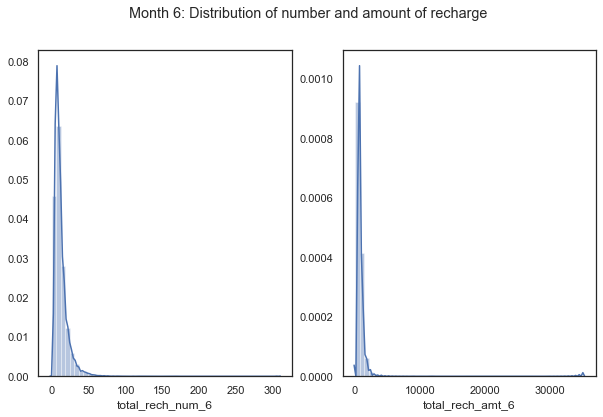

In [40]:
sns.set(style="white")
s = plt.figure(figsize=(10, 6))
s.suptitle("Month 6: Distribution of number and amount of recharge")
plt.subplot(1,2,1)
sns.distplot(imputed_df['total_rech_num_6'])
plt.subplot(1,2,2)
sns.distplot(imputed_df['total_rech_amt_6'])
plt.show()

Both the Variables data is highly skewed

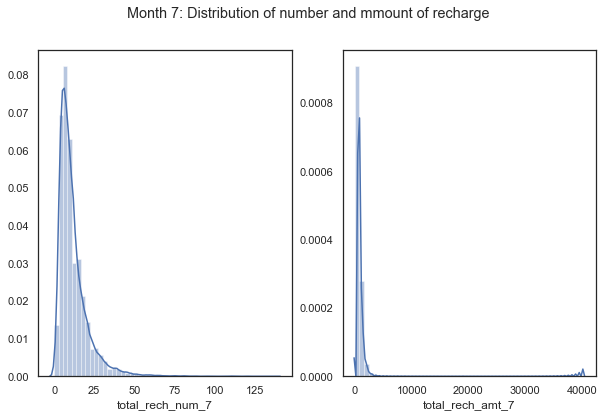

In [41]:
sns.set(style="white")
s=plt.figure(figsize=(10, 6))
s.suptitle("Month 7: Distribution of number and mmount of recharge")
plt.subplot(1,2,1)
sns.distplot(imputed_df['total_rech_num_7'])
plt.subplot(1,2,2)
sns.distplot(imputed_df['total_rech_amt_7'])
plt.show()

Total_reach_amt_7 is highly skewed when compared to total_rech_num_7

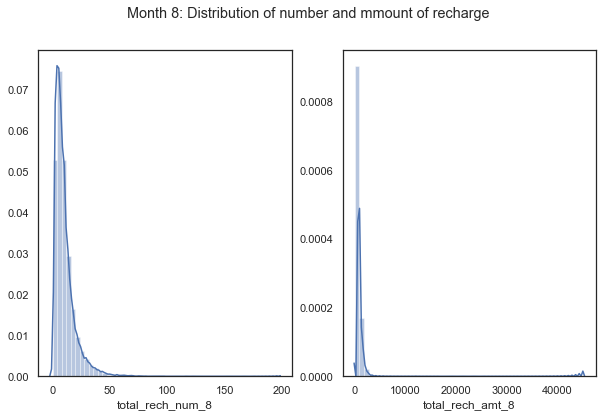

In [42]:
sns.set(style="white")
s=plt.figure(figsize=(10, 6))
s.suptitle("Month 8: Distribution of number and mmount of recharge")
plt.subplot(1,2,1)
sns.distplot(imputed_df['total_rech_num_8'])
plt.subplot(1,2,2)
sns.distplot(imputed_df['total_rech_amt_8'])
plt.show()

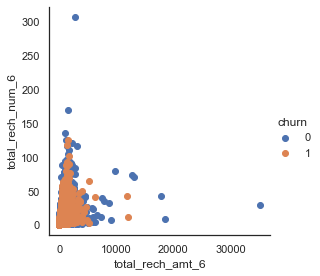

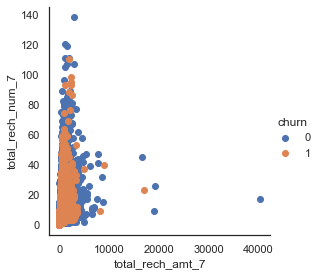

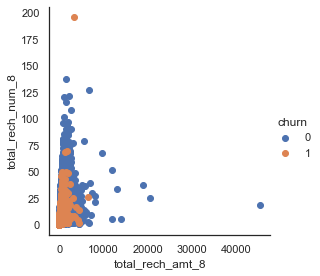

In [43]:
sns.FacetGrid(imputed_df,hue='churn',size=4).map(plt.scatter, "total_rech_amt_6","total_rech_num_6").add_legend()
sns.FacetGrid(imputed_df,hue='churn',size=4).map(plt.scatter, "total_rech_amt_7","total_rech_num_7").add_legend()
sns.FacetGrid(imputed_df,hue='churn',size=4).map(plt.scatter, "total_rech_amt_8","total_rech_num_8").add_legend()

- People who recharge amount is more has less rates of churn

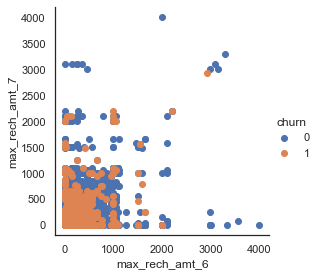

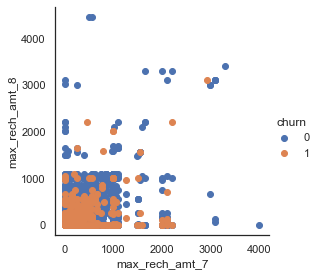

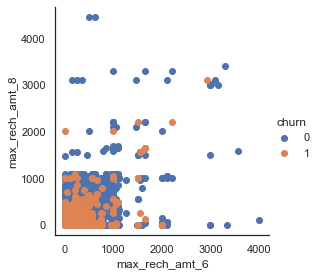

In [44]:

sns.FacetGrid(imputed_df,hue='churn',size=4).map(plt.scatter, "max_rech_amt_6","max_rech_amt_7").add_legend()
sns.FacetGrid(imputed_df,hue='churn',size=4).map(plt.scatter, "max_rech_amt_7","max_rech_amt_8").add_legend()
sns.FacetGrid(imputed_df,hue='churn',size=4).map(plt.scatter, "max_rech_amt_6","max_rech_amt_8").add_legend()

- People who maximum recharge amount is more has less rates of churn

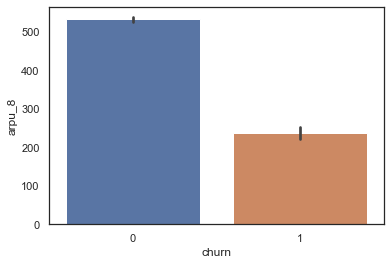

In [45]:
sns.barplot(x='churn', y='arpu_8', data=imputed_df)

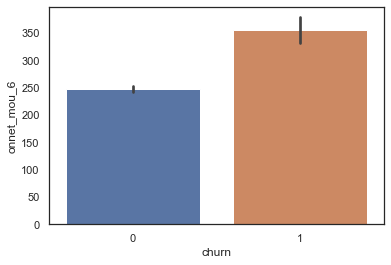

In [46]:
sns.barplot(x='churn', y='onnet_mou_6', data=imputed_df)

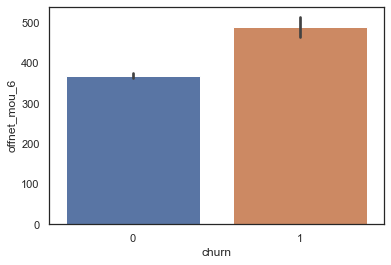

In [47]:
sns.barplot(x='churn', y='offnet_mou_6', data=imputed_df)

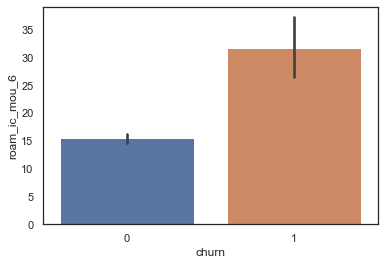

In [48]:
sns.barplot(x='churn', y='roam_ic_mou_6', data=imputed_df)

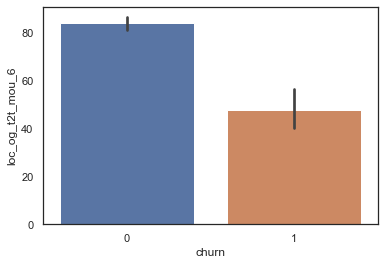

In [49]:
sns.barplot(x='churn', y='loc_og_t2t_mou_6', data=imputed_df)

### Inferences:

    - Most of the varibales are highly skewed.
    - People who recharge amount is more has less rates of churn
    - People who maximum recharge amount is more has less rates of churn
    - It is clear that there is high correlation between a lot of variables. We can see the regions grouped where correlation is high.
    - We can clearly see that churn rate is high among customers with 1-2 years and very very low once the customer has crossed 5+ years
    - If average revenure per user in month 8 is high he is less likey to churn
    - All kind of calls within the same operator network durin month 6 is high then churn rate is high.
    - People who are in roaming zone and receive incoming calls during month 6 is high then churn rate is high

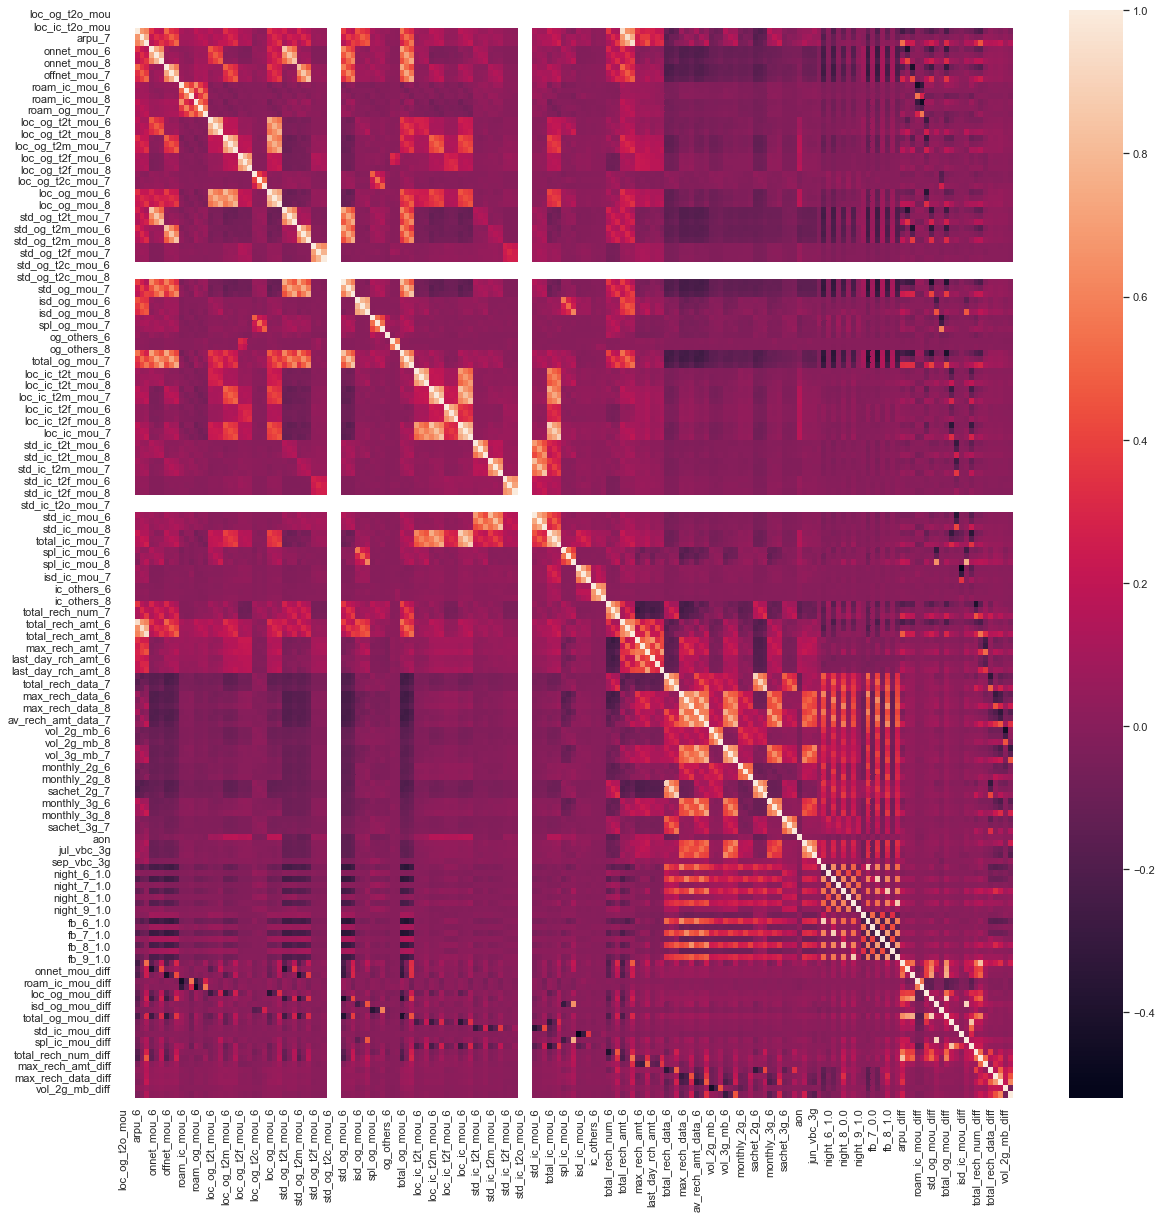

In [50]:
#Check heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(imputed_df.corr())


It is clear that there is high correlation between a lot of variables. We can see the regions grouped where correlation is high.

In [51]:
#Breaking down age on network to months from days
imputed_df['mon'] = imputed_df['aon']/30
imputed_df.drop('aon', axis=1, inplace=True)
imputed_df['mon'].head()

0    32.266667
1    26.733333
2    10.500000
3    24.000000
4    20.133333
Name: mon, dtype: float64

In [52]:
def compute_years(x):
    if x<=12:
        return "<1"
    elif x<=24 and x>12:
        return "1-2"
    elif x<=60 and x>24:
        return "2-5"
    else:
        return "5+"
    
imputed_df['years_with_company'] = imputed_df.apply(lambda x: compute_years(x['mon']),axis=1)
imputed_df['years_with_company'].unique()

array(['2-5', '<1', '1-2', '5+'], dtype=object)

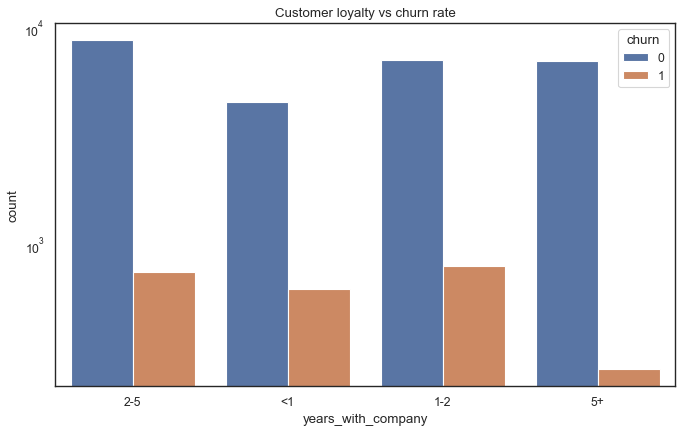

In [53]:

sns.set(style="white")
plt.figure(figsize=(10,6),edgecolor="k",facecolor="w",dpi=80)
sns.countplot(imputed_df['years_with_company'],hue=imputed_df["churn"])
plt.yscale("log")
plt.title("Customer loyalty vs churn rate")
plt.show()

We can clearly see that churn rate is high among customers with 1-2 years and very very low once the customer has crossed 5+ years

In [54]:
#dropping the col to prevent nulti collinearlity
imputed_df.drop('years_with_company', axis=1, inplace=True)

## Outlier analysis

In [55]:
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [56]:
num_cols.remove('aon')


Cap outliers in all numeric variables with k-sigma technique

In [57]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [58]:
# cap outliers in the numeric columns
imputed_df[num_cols] = imputed_df[num_cols].apply(cap_outliers, axis=0)

# Data modelling

In [59]:
#importing all libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Preprocessing the data

In [60]:
imputed_df_lr = imputed_df.copy(deep=True)

# Data Imbalance check

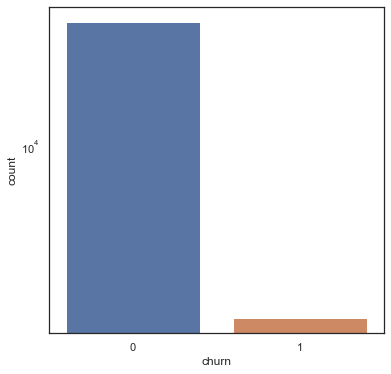

In [61]:
plt.figure(figsize=(6,6))
sns.countplot(x='churn', data=imputed_df_lr)
plt.yscale('log')
plt.show()

## Data is highly imbalanced - Which needs to be handled while modelling

### Test-train split

In [62]:
#Test and train split
# divide data into train and test
X = imputed_df_lr.drop("churn", axis = 1)
y = imputed_df_lr.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22500, 182)
(7501, 182)
(22500,)
(7501,)


### Scaling the data

In [64]:
from sklearn.preprocessing import StandardScaler
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train)
X_test_scaled=scaler_lr.transform(X_test)

In [65]:
X_train_scaled

array([[ 0.        ,  0.        ,  0.        , ...,  4.10825748,
         0.01804342, -0.62978745],
       [ 0.        ,  0.        ,  0.        , ...,  0.07906615,
         2.34055519, -0.91375008],
       [ 0.        ,  0.        ,  0.        , ...,  0.11275137,
         0.01804342, -0.9462329 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.11275137,
         0.01804342, -1.07197281],
       [ 0.        ,  0.        ,  0.        , ...,  0.11275137,
         0.01804342,  0.32688372],
       [ 0.        ,  0.        ,  0.        , ..., -0.07150308,
        -0.99266937, -0.83201914]])

In [66]:
## Balancing the actual variable using oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
X_bal,y_bal = sm.fit_sample(X_train_scaled,y_train.ravel())

In [67]:
np.unique(y_bal,return_counts=True)

(array([0, 1], dtype=int64), array([20669, 20669], dtype=int64))

## Building an interpretable model - Logistic model

In [68]:
#Using RFE to determine the top 20 features
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
logreg = LogisticRegression()
rfe = RFE(logreg,20)
rfe.fit(X_bal,y_bal)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [69]:
rfe_features = imputed_df_lr.drop('churn', axis=1).columns[rfe.support_]
display(rfe_features)

Index(['onnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_7', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8',
       'loc_ic_t2m_mou_6', 'loc_ic_mou_6', 'last_day_rch_amt_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'sep_vbc_3g', 'night_9_0.0',
       'night_9_1.0', 'fb_9_0.0', 'fb_9_1.0', 'loc_ic_mou_diff',
       'vol_3g_mb_diff'],
      dtype='object')

In [70]:
X_lr_rfe = pd.DataFrame(X_bal).iloc[:,rfe.support_]
X_lr_rfe.head()
X_lr_rfe.columns = rfe_features
X_lr_rfe.head()

,onnet_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_7,std_og_mou_8,isd_og_mou_8,og_others_8,loc_ic_t2m_mou_6,loc_ic_mou_6,last_day_rch_amt_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sep_vbc_3g,night_9_0.0,night_9_1.0,fb_9_0.0,fb_9_1.0,loc_ic_mou_diff,vol_3g_mb_diff
0,-0.632496,-0.431654,-0.799405,-0.482678,-0.597254,0.159046,-0.05822,-0.674632,-0.747383,-0.671824,-0.494031,-0.512552,-0.492522,-0.231309,0.998934,-0.094224,-0.243356,1.097930,-0.073230,0.018043
1,-0.603841,-0.431654,-0.666334,-0.482678,-0.572079,0.159046,-0.05822,-0.438653,-0.513568,-0.833619,2.756189,2.499187,4.256410,-0.231309,0.998934,-0.094224,-0.243356,1.097930,-0.213281,2.340555
2,1.085371,-0.431654,-0.799405,1.374521,-0.597254,0.159046,-0.05822,-0.507777,-0.507930,-0.833619,-0.494031,-0.512552,-0.492522,-0.231309,-1.001067,-0.094224,-0.243356,-0.910805,-0.565550,0.018043
3,-0.536477,-0.431654,-0.642863,-0.369009,0.742256,0.159046,-0.05822,-0.834843,-0.866063,-0.747963,-0.494031,-0.512552,-0.492522,-0.231309,-1.001067,-0.094224,-0.243356,-0.910805,0.171361,0.018043
4,-0.602102,-0.030110,0.543814,-0.482678,3.697807,0.159046,-0.05822,-0.519567,-0.638329,0.403636,-0.494031,-0.512552,-0.492522,-0.231309,-1.001067,-0.094224,-0.243356,-0.910805,1.448729,0.018043


In [71]:
y_rfe = y_bal

In [72]:
logreg_rfe = LogisticRegression(random_state=100)
logreg_rfe.fit(X_lr_rfe,y_rfe)

LogisticRegression(random_state=100)

In [73]:
X_test_rfe = pd.DataFrame(X_test_scaled).iloc[:,rfe.support_]
y_pred = logreg_rfe.predict(X_test_rfe)

In [74]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(logreg_rfe.score(X_test_rfe,y_test))
print(classification_report(y_test,y_pred))

[[5703 1188]
 [  67  543]]
0.8326889748033596
0.8326889748033596
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      6891
           1       0.31      0.89      0.46       610

    accuracy                           0.83      7501
   macro avg       0.65      0.86      0.68      7501
weighted avg       0.93      0.83      0.87      7501



In [75]:
# intercept
intercept_df = pd.DataFrame(logreg_rfe.intercept_.reshape((1,1)), columns = ['intercept'])

In [76]:
intercept_df

,intercept
0,-5.481345


In [77]:
rfe_features

Index(['onnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_7', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8',
       'loc_ic_t2m_mou_6', 'loc_ic_mou_6', 'last_day_rch_amt_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'sep_vbc_3g', 'night_9_0.0',
       'night_9_1.0', 'fb_9_0.0', 'fb_9_1.0', 'loc_ic_mou_diff',
       'vol_3g_mb_diff'],
      dtype='object')

In [78]:
# intercept
coef_df = pd.DataFrame(logreg_rfe.coef_.reshape((20,1)), columns = ['coefficeints'])
col_df=pd.DataFrame(rfe_features,columns=['Col_name'])

In [79]:
coefficients = pd.concat([coef_df,col_df], axis=1)
coefficients

,coefficeints,Col_name
0,1.063107,onnet_mou_7
1,-0.826941,loc_og_t2t_mou_8
2,-0.655804,loc_og_t2m_mou_8
3,-0.754201,std_og_t2t_mou_7
4,-0.506342,std_og_mou_8
5,-0.644043,isd_og_mou_8
6,-0.498088,og_others_8
7,0.383388,loc_ic_t2m_mou_6
8,-1.290304,loc_ic_mou_6
9,-0.503960,last_day_rch_amt_8


## Inferences
- Person who uses internet to access fb in churn month 9 is less likely to churn and vice versa
- Please who use mobile internet less in 8th month are more likely to churn and people who isuse more mobile internet during good phase(6th and 7th month) are less likely to churn
- People who use scheme of particluat night hrs are less likely to churn.
- people who do calls to same operating curcly during month 7 are more likely to churn
- People who use more 3g mobile data in month 6 and 7th and sudelly dropits usage at month 8 are more liekly to churn.
- People who do more calls in month 8 and 7 in both same operator or different operator are less likely to churn.
- People who make more std and isd calls in month 8 are less liekly to churn

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_bal,y_bal)
rf1_y_pred = rf1.predict(X_test_scaled)

In [81]:
print(accuracy_score(y_test,rf1_y_pred))
print(confusion_matrix(y_test,rf1_y_pred))
print(classification_report(y_test,rf1_y_pred))

0.9450739901346488
[[6650  241]
 [ 171  439]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6891
           1       0.65      0.72      0.68       610

    accuracy                           0.95      7501
   macro avg       0.81      0.84      0.83      7501
weighted avg       0.95      0.95      0.95      7501



,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_6_0.0,night_6_1.0,night_7_0.0,night_7_1.0,night_8_0.0,night_8_1.0,night_9_0.0,night_9_1.0,fb_6_0.0,fb_6_1.0,fb_7_0.0,fb_7_1.0,fb_8_0.0,fb_8_1.0,fb_9_0.0,fb_9_1.0,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,mon
0,0.0,0.0,0.0,-0.914693,-1.524723,-0.820753,-0.627823,-0.632496,-0.574854,-0.894688,-0.893916,-0.823443,-0.311671,-0.263048,-0.287805,-0.317532,-0.287934,-0.302922,-0.498000,-0.488902,-0.431654,-0.788909,-0.808734,-0.799405,-0.437172,-0.439586,-0.451232,-0.366313,-0.344493,-0.371505,-0.785067,-0.797930,-0.759985,-0.470053,-0.482678,-0.451682,-0.530844,-0.527602,-0.505723,-0.248400,-0.241163,-0.251224,0.0,0.0,0.0,-0.634527,-0.643467,-0.597254,0.073445,0.069979,0.159046,-0.202435,-0.507262,0.809416,-0.368567,-0.054166,-0.05822,-0.952070,-0.964033,-0.858032,-0.560258,-0.576079,-0.530958,-0.674632,-0.783673,-0.832249,-0.483844,-0.477179,-0.497220,-0.747383,-0.829222,-0.843419,0.188652,-0.315620,0.634990,-0.475092,-0.400639,-0.467849,-0.274555,-0.278722,-0.278372,0.0,0.0,0.0,-0.287176,-0.450244,-0.097468,-0.753934,-0.866244,-0.772614,0.128834,0.133262,0.199851,-0.252108,-0.261421,-0.265711,-0.216880,-0.223453,-0.230361,-0.691176,-1.397013,-0.831851,-0.903209,-1.470525,-0.771985,0.275290,-1.229055,0.342478,0.989493,-0.906741,-0.671824,1.034909,-0.679656,0.201044,1.240728,-0.778947,1.312958,0.690998,-0.781904,0.601736,4.148702,-0.46278,4.403973,-0.494031,-0.512552,-0.492522,2.144184,-0.429677,2.378278,0.982708,-0.48527,0.021653,-0.401917,-0.399845,-0.390161,-0.303762,-0.294518,-0.267482,-0.477048,-0.475194,-0.456223,-0.231309,0.91

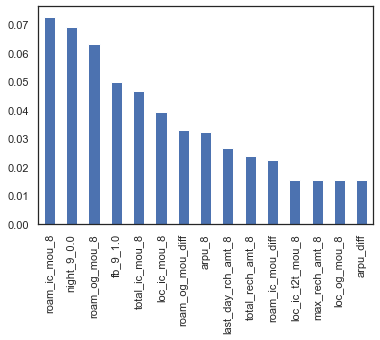

In [82]:
X = X_bal
X = pd.DataFrame(X_bal)
X.columns = imputed_df_lr.drop('churn',axis=1).columns
display(X.head())

rf1.feature_importances_.shape
importances = rf1.feature_importances_
importances.shape
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values(ascending=False)[:15].plot(kind = 'bar')

-- Inferences

The top 10 features are 
roam_og_mou, roam_ic_mou, fb_9, night_9, total_ic_mou, total_reach_amount_8, loc_ic_mou_8,arpu_8,loc_ic_t2t_mou_8,fb_8_1.
The above features explains about the cusomter churn rate.

## Using PCA for feature reduction

In [83]:
imputed_df.shape

(30001, 183)

In [84]:
df_PCA = imputed_df.copy(deep=True)

In [85]:
#Test and train split
# divide data into train and test
X = df_PCA.drop("churn", axis = 1)
y = df_PCA.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train)
X_test_scaled=scaler_lr.transform(X_test)

In [87]:
#Balancing dataset for classification
from imblearn.over_sampling import SMOTE

In [88]:
sm=SMOTE(random_state=100)
X_sm,y_sm=sm.fit_sample(X_train_scaled,y_train)
print(X_sm.shape)
print(y_sm.shape)

(41338, 182)
(41338,)


In [89]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [90]:
pca.fit(X_sm)

PCA(random_state=100)

In [91]:
X_train_pca=pca.fit_transform(X_sm)
display(X_train_pca.shape)

X_test_pca = pca.transform(X_test_scaled)
display(X_test_pca.shape)

(41338, 182)

(7501, 182)

## Building logistic model on top of PCA selected variables

In [92]:
logreg = LogisticRegression()
logreg.fit(X_train_pca,y_sm)

LogisticRegression()

In [93]:
y_pred = logreg.predict(X_test_pca)

In [94]:
print(confusion_matrix(y_test,y_pred))

[[5940  951]
 [  65  545]]


In [95]:
print(accuracy_score(y_test,y_pred))

0.8645513931475803


In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6891
           1       0.36      0.89      0.52       610

    accuracy                           0.86      7501
   macro avg       0.68      0.88      0.72      7501
weighted avg       0.94      0.86      0.89      7501



In [97]:
#Checking components of PCA and applying logreg again depending on variance explained by skre plot
pca.components_

array([[ 1.43103847e-19, -5.55111512e-17,  2.22044605e-16, ...,
         3.06959385e-02,  4.08474306e-02,  5.31621212e-02],
       [-3.13867862e-19,  1.11022302e-16, -0.00000000e+00, ...,
         3.79486695e-02,  3.50936297e-02, -3.26350566e-03],
       [-4.26358580e-19, -5.55111512e-17,  1.11022302e-16, ...,
         6.49292892e-03, -1.75914263e-02,  6.32821676e-02],
       ...,
       [ 0.00000000e+00, -3.40725805e-02,  9.96635074e-03, ...,
        -1.73472348e-18,  2.86229374e-17, -1.30104261e-17],
       [ 9.99998883e-01, -3.89899095e-04, -1.40764288e-03, ...,
        -3.43692089e-17, -8.57197343e-19,  1.20617492e-18],
       [-0.00000000e+00,  8.04041083e-02,  6.21722417e-03, ...,
         7.63278329e-17,  2.90566182e-17, -5.63785130e-17]])

In [98]:
pcadf=pd.DataFrame({'Feature':list(X.columns),'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2]})
pcadf.head()

,Feature,PC1,PC2,PC3
0,loc_og_t2o_mou,1.431038e-19,-3.138679e-19,-4.263586e-19
1,std_og_t2o_mou,-5.551115e-17,1.110223e-16,-5.551115e-17
2,loc_ic_t2o_mou,2.220446e-16,-0.000000e+00,1.110223e-16
3,arpu_6,-2.837812e-02,1.225946e-01,1.225480e-01
4,arpu_7,6.671465e-02,1.213479e-01,8.041223e-02


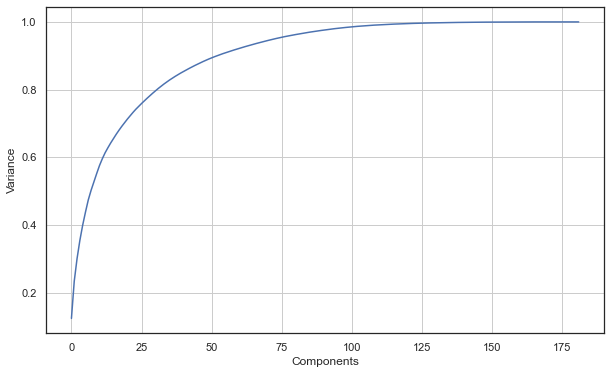

In [99]:

#Skree plot
f = plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance')
plt.grid(True)
plt.show()

In [100]:

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.35, 23.34, 30.01, 35.38, 39.88, 43.75, 47.35, 50.19, 52.68,
       55.14, 57.5 , 59.5 , 61.27, 62.77, 64.19, 65.52, 66.8 , 68.01,
       69.16, 70.24, 71.3 , 72.3 , 73.27, 74.19, 75.04, 75.85, 76.65,
       77.42, 78.17, 78.91, 79.62, 80.31, 80.98, 81.61, 82.21, 82.79,
       83.34, 83.87, 84.38, 84.86, 85.32, 85.78, 86.22, 86.65, 87.07,
       87.47, 87.87, 88.26, 88.63, 88.99, 89.34, 89.66, 89.97, 90.27,
       90.57, 90.85, 91.13, 91.4 , 91.66, 91.92, 92.17, 92.42, 92.66,
       92.9 , 93.14, 93.37, 93.6 , 93.82, 94.04, 94.25, 94.46, 94.67,
       94.87, 95.06, 95.25, 95.43, 95.6 , 95.77, 95.93, 96.09, 96.24,
       96.39, 96.54, 96.68, 96.82, 96.95, 97.08, 97.2 , 97.32, 97.44,
       97.56, 97.67, 97.78, 97.89, 97.99, 98.09, 98.18, 98.27, 98.35,
       98.43, 98.51, 98.59, 98.66, 98.72, 98.78, 98.84, 98.9 , 98.96,
       99.01, 99.06, 99.11, 99.15, 99.19, 99.23, 99.27, 99.31, 99.35,
       99.39, 99.42, 99.45, 99.48, 99.51, 99.54, 99.57, 99.59, 99.61,
       99.63, 99.65,

For variance of ~90% we get ~54 components.

Hence applying logistic regression with 54 components now.

In [101]:

pca_new = PCA(n_components=54)

In [102]:
X_train_pca_new = pca_new.fit_transform(X_sm)
X_test_pca_new = pca_new.transform(X_test_scaled)
print(X_train_pca_new.shape)
print(X_test_pca_new.shape)

(41338, 54)
(7501, 54)


In [103]:
X_train_pca_new

array([[ 2.09365036e+00, -4.08909844e+00, -3.36996259e+00, ...,
        -1.65657908e-01,  6.44639567e-01,  9.22524543e-01],
       [ 4.41418948e+00, -7.16288704e+00, -9.17841036e-02, ...,
        -3.41126677e-01, -1.79611652e-01,  4.71028173e-01],
       [-2.52213747e+00,  4.29778196e+00, -1.68110909e+00, ...,
        -3.59070221e-01, -2.84343972e-01,  3.53647095e-03],
       ...,
       [-1.08392576e+00,  5.49252687e+00, -2.21100646e+00, ...,
        -1.75242964e-01, -1.07613188e-01,  5.58431702e-01],
       [-7.80314221e+00, -3.55464085e+00,  5.90247693e+00, ...,
         5.81905037e-01, -2.51164980e-01,  3.77695890e-01],
       [ 1.01409991e+00, -4.20972428e+00, -4.03066789e+00, ...,
         4.65891065e-01, -2.53834370e-01, -9.59424656e-01]])

In [104]:
logreg_new = LogisticRegression() 
logreg_new.fit(X_train_pca_new,y_sm)
y_pred_new = logreg_new.predict(X_test_pca_new)

In [105]:

print(confusion_matrix(y_test,y_pred_new))

[[5873 1018]
 [  72  538]]


In [106]:
print(accuracy_score(y_test,y_pred_new))

0.8546860418610852


In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6891
           1       0.36      0.89      0.52       610

    accuracy                           0.86      7501
   macro avg       0.68      0.88      0.72      7501
weighted avg       0.94      0.86      0.89      7501



In [108]:
pca_column_frame = pcadf.head(54)

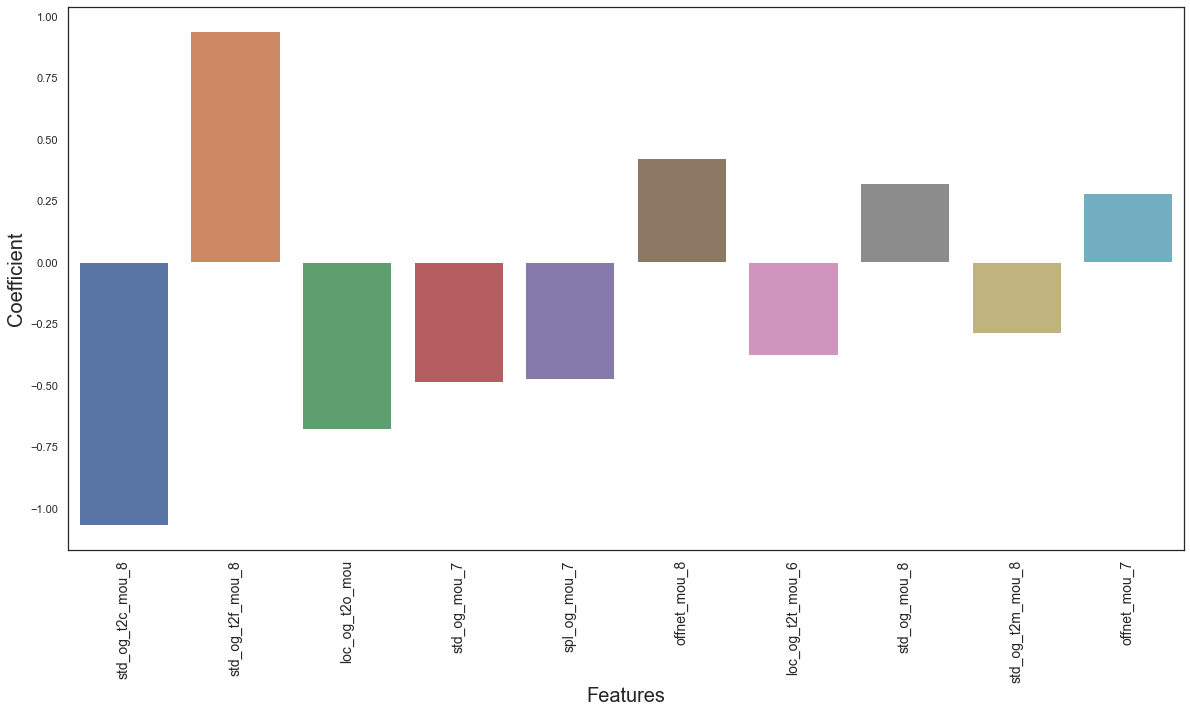

In [109]:
pca_column_frame['sampling_coeff'] = logreg_new.coef_[0]
plt.figure(figsize=(20, 10))
top_10_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
sns.barplot(x='Feature', y='sampling_coeff', data=top_10_features)
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

## Building decision tree model on top of PCA selected variables 

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtree_pca = DecisionTreeClassifier(max_depth=5)
dtree_pca.fit(X_train_pca_new,y_sm)

DecisionTreeClassifier(max_depth=5)

In [111]:
dtree_y_predfinal_pca = dtree_pca.predict(X_test_pca_new)

In [112]:
print(classification_report(y_test,dtree_y_predfinal_pca))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      6891
           1       0.35      0.79      0.48       610

    accuracy                           0.86      7501
   macro avg       0.66      0.83      0.70      7501
weighted avg       0.93      0.86      0.89      7501



In [113]:
#Optimising dtree params according to PCA
nfolds=5
params_grid = {'max_depth':range(5,20,5),
              'min_samples_leaf': range(25,200,50),
               'min_samples_split': range(25,200,50),
               'criterion':['gini','entropy']}
dtree_grid_pca = DecisionTreeClassifier()
grid_model_pca = GridSearchCV(dtree_grid_pca,cv=nfolds,param_grid=params_grid, n_jobs=-1)
grid_model_pca.fit(X_train_pca_new,y_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(25, 200, 50),
                         'min_samples_split': range(25, 200, 50)})

In [114]:
grid_model_pca.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 25,
 'min_samples_split': 25}

In [115]:
dtree_optimal = DecisionTreeClassifier(max_depth=15,min_samples_leaf=25, min_samples_split=25,criterion='entropy')
dtree_optimal.fit(X_train_pca_new,y_sm)
y_pred_dtree_opt = dtree_optimal.predict(X_test_pca_new)

In [116]:
print(classification_report(y_test,y_pred_dtree_opt))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      6891
           1       0.36      0.71      0.48       610

    accuracy                           0.87      7501
   macro avg       0.66      0.80      0.70      7501
weighted avg       0.92      0.87      0.89      7501



## Building Random Forest model on top of PCA selected variables 

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca_new,y_sm)

RandomForestClassifier()

In [118]:
y_pred_rf_pca = rf_pca.predict(X_test_pca_new)
print(classification_report(y_test,y_pred_rf_pca))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6891
           1       0.52      0.61      0.56       610

    accuracy                           0.92      7501
   macro avg       0.74      0.78      0.76      7501
weighted avg       0.93      0.92      0.92      7501



In [119]:
# #Optimising with gridsearchcv
n_folds=5
params_grid={
    'max_depth': range(2,20,5),
     'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
     'max_features': [5, 10]
 }

rf_grid_pca = RandomForestClassifier()
grid_rf_model_pca = GridSearchCV(rf_grid_pca,cv=n_folds,param_grid=params_grid,scoring="accuracy",n_jobs=-1, verbose=1)
grid_rf_model_pca.fit(X_train_pca_new,y_sm)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 55.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 66.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5), 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [120]:
grid_rf_model_pca.best_params_

{'max_depth': 17,
 'max_features': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 200}

In [121]:
rf_opt_pca=RandomForestClassifier(max_depth=17, max_features=5,min_samples_leaf=100, min_samples_split=200, n_estimators=300)
rf_opt_pca.fit(X_train_pca_new,y_sm)
y_pred_final_rf_opt = rf_opt_pca.predict(X_test_pca_new)

In [122]:
rf_opt_pca.feature_importances_

array([0.40528969, 0.01294535, 0.01137035, 0.01020747, 0.01847542,
       0.00856015, 0.01022776, 0.00433747, 0.0085548 , 0.00525692,
       0.00825196, 0.05863824, 0.00992481, 0.00950428, 0.00695357,
       0.01215566, 0.00731115, 0.00558861, 0.00473899, 0.00649423,
       0.00579357, 0.00502623, 0.01495823, 0.00686992, 0.00433321,
       0.00262113, 0.00586068, 0.00790293, 0.02947148, 0.00463091,
       0.00413821, 0.01682261, 0.00731128, 0.00351557, 0.00510211,
       0.00289319, 0.00855742, 0.00360474, 0.00498601, 0.0073012 ,
       0.00244609, 0.06270622, 0.00238616, 0.00282616, 0.0437407 ,
       0.00317831, 0.01099041, 0.02122041, 0.0164012 , 0.02138194,
       0.01182697, 0.01175798, 0.01085387, 0.00179607])

In [123]:
pca_new

PCA(n_components=54)

In [124]:
rf_opt_pca.feature_importances_

array([0.40528969, 0.01294535, 0.01137035, 0.01020747, 0.01847542,
       0.00856015, 0.01022776, 0.00433747, 0.0085548 , 0.00525692,
       0.00825196, 0.05863824, 0.00992481, 0.00950428, 0.00695357,
       0.01215566, 0.00731115, 0.00558861, 0.00473899, 0.00649423,
       0.00579357, 0.00502623, 0.01495823, 0.00686992, 0.00433321,
       0.00262113, 0.00586068, 0.00790293, 0.02947148, 0.00463091,
       0.00413821, 0.01682261, 0.00731128, 0.00351557, 0.00510211,
       0.00289319, 0.00855742, 0.00360474, 0.00498601, 0.0073012 ,
       0.00244609, 0.06270622, 0.00238616, 0.00282616, 0.0437407 ,
       0.00317831, 0.01099041, 0.02122041, 0.0164012 , 0.02138194,
       0.01182697, 0.01175798, 0.01085387, 0.00179607])

In [125]:
print(classification_report(y_test,y_pred_final_rf_opt))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      6891
           1       0.40      0.78      0.53       610

    accuracy                           0.89      7501
   macro avg       0.69      0.84      0.73      7501
weighted avg       0.93      0.89      0.90      7501



# Conclusion and Recommendations:

Churn Ratio:
    - 0    91.863605
    - 1     8.136395


EDA: 
    - Most of the varibales are highly skewed.
    - People who recharge amount is more has less rates of churn
    - People who maximum recharge amount is more has less rates of churn
    - It is clear that there is high correlation between a lot of variables. We can see the regions grouped where correlation is high.
    - We can clearly see that churn rate is high among customers with 1-2 years and very very low once the customer has crossed 5+ years
    - If average revenure per user in month 8 is high he is less likey to churn
    - All kind of calls within the same operator network durin month 6 is high then churn rate is high.
    - People who are in roaming zone and receive incoming calls during month 6 is high then churn rate is high



Logistic regression model: 
    - Accuracy score : 84%
    - Recall : 83%(0) and 89%(1)
    - Inferences:
        - Person who uses internet to access fb in churn month 9 is less likely to churn and vice versa
        - Please who use mobile internet less in 8th month are more likely to churn and people who isuse more mobile internet during good phase(6th and 7th month) are less likely to churn
        - People who use scheme of particluat night hrs are less likely to churn.
        - people who do calls to same operating curcly during month 7 are more likely to churn
        - People who use more 3g mobile data in month 6 and 7th and sudelly dropits usage at month 8 are more liekly to churn.
        - People who do more calls in month 8 and 7 in both same operator or different operator are less likely to churn.
        - People who make more std and isd calls in month 8 are less liekly to churn
        
Random Forest:
    - Accuracy score : 94%
    - Recall : 96%(0) and 72%(1)
    - Inferences:
      - The top 10 features are roam_og_mou, roam_ic_mou, fb_9, night_9, total_ic_mou, total_reach_amount_8,loc_ic_mou_8,arpu_8,loc_ic_t2t_mou_8,fb_8_1. The above features explains about the cusomter churn rate.
     
PCA: 
    - For variance of ~90% we get ~54 components.

Logistic+PCA:
    - Accuracy score : 85%
    - Recall : 86%(0) and 90%(1)
    - Top 10 features are std_og_t2t_mou_8,std_og_t2f_mou_8,loc_og_t2o_mou,spl_og_mou_7,std_og_mou_7,offnet_mou_8,log_og_t2t_mou_6,std_og_t2m_mou_8,offnet_mouu_7,std_og_t2t_mou_7

Decision_Tree+PCA:
    - Accuracy score : 87%
    - Recall : 88%(0) and 74%(1)
    - Best hyper parameters: {'criterion': 'entropy','max_depth': 15,'min_samples_leaf': 25,'min_samples_split': 25}

Random_Tree+PCA:
    - Accuracy score : 89%
    - Recall : 90%(0) and 77%(1)
    - Best hyper parameters: {'max_depth': 17,'max_features': 5,'min_samples_leaf': 100,'min_samples_split'200,'n_estimators': 300}